In [1]:
#****************************************************************************************************************************#
# Project             : Clustering Analysis on wine data set                                                                 #                    # 
# Objective           : Perfrom K-Means algorithm to build the clusters of similar wine categories and to find the optimal K #
#                       value which defines the number of clusters                                                           # 
# Model               : K-Means algorithm from scratch                                                                       # 
# Performance Metrics : Optimal K value using Elbow Method                                                                   #        #                  
# Author              : Pavan Kumar Battula                                                                                  # 
#****************************************************************************************************************************#

## Importing the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Given Data Set and analyse the data

In [3]:
data = pd.read_csv('C:/Users/PAVAN REDDY BATTULA/Desktop/UNH/Fall-2021/Maths for Data Scientists/Canvas/13 Machine Learning/DSCI6001_prj2_data.csv')
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Taking the top 2 highest correlated features for performing K-Means Clustering

In [6]:
data.corr()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


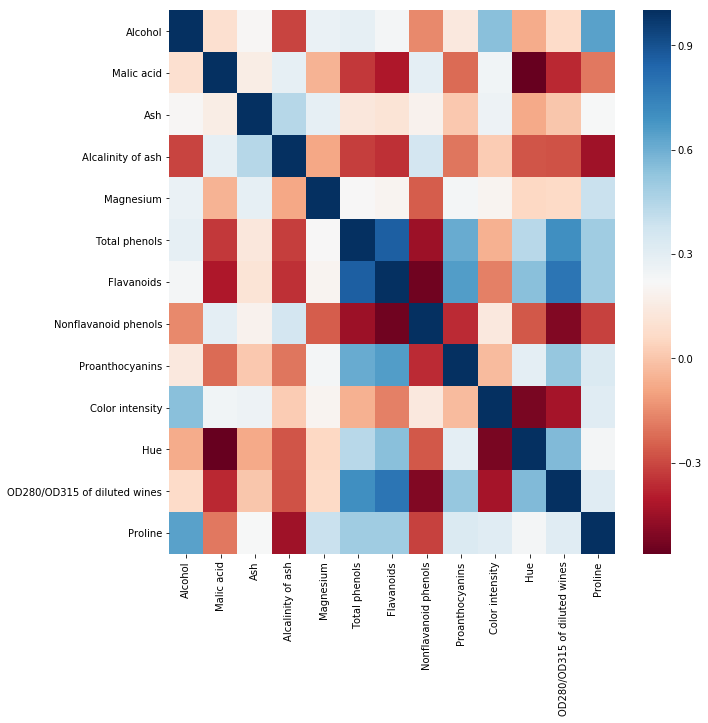

In [7]:
data.corr() 
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), cmap = 'RdBu')
plt.show()

## Scatter plot before K-Mean Clustering

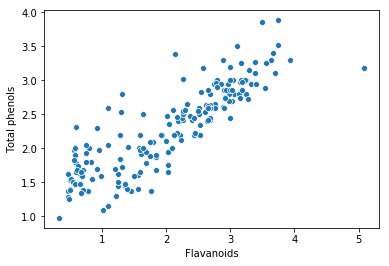

In [8]:
sns.scatterplot(data['Flavanoids'],data['Total phenols']) 

## Taking the K value as 3 with random cetroids

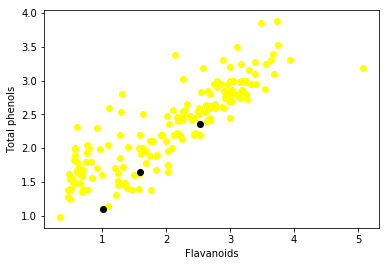

The Initial Random Centroids are: 83    1.59
70    1.02
34    2.53
Name: Flavanoids, dtype: float64 83    1.65
70    1.10
34    2.35
Name: Total phenols, dtype: float64


In [9]:
K=3
np.random.seed(420)
centroids = data.sample(n=K)
plt.scatter(data['Flavanoids'],data['Total phenols'], c = 'yellow')
plt.scatter(centroids['Flavanoids'],centroids['Total phenols'],c='black')
plt.xlabel('Flavanoids')
plt.ylabel('Total phenols')
plt.show()

print("The Initial Random Centroids are:",centroids['Flavanoids'],centroids['Total phenols'])

## Building K-Mean Algorithm

In [10]:
Mean_diff = 1
j=0

while(Mean_diff!=0):
    i=1
    for index1,row_c in centroids.iterrows():
        Eclu_Dist=[]
        for index2,row_d in data.iterrows():
            dist1=(row_c["Flavanoids"]-row_d["Flavanoids"])**2
            dist2=(row_c["Total phenols"]-row_d["Total phenols"])**2
            d=np.sqrt(dist1+dist2)
            Eclu_Dist.append(d)
        data[i]=Eclu_Dist
        i=i+1
    
   
    Cluster=[]
    for index,row in data.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        Cluster.append(pos)
    data["Cluster"]=Cluster
    
    centroids_new = data.groupby(["Cluster"]).mean()[["Total phenols","Flavanoids"]]
    
    if j == 0:
        diff=1
        j=j+1
    else:
        Mean_diff = (centroids_new['Total phenols'] - centroids['Total phenols']).sum() + (centroids_new['Flavanoids'] - centroids['Flavanoids']).sum()
        print("The Mean Difference :",Mean_diff.sum())
    
    centroids = data.groupby(["Cluster"]).mean()[["Total phenols","Flavanoids"]]

print("The Ecludien distances between Data is:", data)   

The Mean Difference : 0.4388071126277574
The Mean Difference : 0.18496090390179076
The Mean Difference : 0.1839712459057703
The Mean Difference : 0.18469011607491992
The Mean Difference : 0.2156465704415289
The Mean Difference : 0.12254791014791111
The Mean Difference : 0.03133910207439616
The Mean Difference : 0.0
The Ecludien distances between Data is:      Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
5      14.20        1.76  2.45               15.2        112           3.27   
6      14.39        1.87  2.45               14.6         96           2.50   
7      14.0

## Plotting the scatter plot after K-Mean Clustering

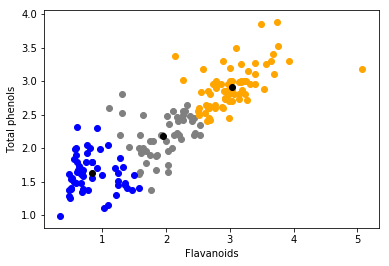

In [11]:
color=['grey','blue','orange']
for k in range(K):
   data1 =data[data["Cluster"]==k+1]
   plt.scatter(data1["Flavanoids"],data1["Total phenols"],c=color[k])
plt.scatter(centroids["Flavanoids"],centroids["Total phenols"],c='black')
plt.xlabel('Flavanoids')
plt.ylabel('Total phenols')
plt.show()

## Elbow Method to find the Optimal K Value

In [12]:
wcss = []
for x in range(1,10):
    np.random.seed(420)
    dist = d = d1 = d2 = d3 = d4 = d5 = d6 = 0
    centroids = data.sample(n=x)
    Mean_diff = 1
    j=0

    while(Mean_diff!=0):
        i=1
        for index1,row_c in centroids.iterrows():
            Eclu_Dist=[]
            for index2,row_d in data.iterrows():
                d1=(row_c["Flavanoids"]-row_d["Flavanoids"])**2
                d2=(row_c["Total phenols"]-row_d["Total phenols"])**2
                d=np.sqrt(d1+d2)
                Eclu_Dist.append(d)
            data[i]=Eclu_Dist
            i=i+1
    
   
        Cluster=[]
        for index,row in data.iterrows():
            min_dist=row[1]
            pos=1
            for i in range(x):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos=i+1
            Cluster.append(pos)
        data["Cluster"]=Cluster
    
        centroids_new = data.groupby(["Cluster"]).mean()[["Total phenols","Flavanoids"]]
    
        if j == 0:
            diff=1
            j=j+1
        else:
            Mean_diff = (centroids_new['Total phenols'] - centroids['Total phenols']).sum() + (centroids_new['Flavanoids'] - centroids['Flavanoids']).sum()
        centroids = data.groupby(["Cluster"]).mean()[["Total phenols","Flavanoids"]]
  
    # Finding WCSS(Within cluster sum of squares) 
    for m in range(x):
        data1 =data[data["Cluster"]==m+1]
        d3=d4=d5=d6=0
        for index1,row_c in centroids.iterrows():
            if index1 == m+1:
                for index2,row_d in data1.iterrows():
                    d3=(row_c["Flavanoids"]-row_d["Flavanoids"])**2
                    d4=(row_c["Total phenols"]-row_d["Total phenols"])**2
                    d5= d3 + d4
                    d6= d6 + d5
        dist = dist + d6 
    wcss.append(dist)    
    print("The WCSS for",x,"cluster is",dist) 

The WCSS for 1 cluster is 245.92525280898883
The WCSS for 2 cluster is 67.47656579380138
The WCSS for 3 cluster is 42.078666444746915
The WCSS for 4 cluster is 29.5078142340347
The WCSS for 5 cluster is 23.56288428711123
The WCSS for 6 cluster is 22.35318659057554
The WCSS for 7 cluster is 18.650711121351765
The WCSS for 8 cluster is 17.45894518720291
The WCSS for 9 cluster is 15.121947976241415


## WCSS Graph shows the optimal K - value

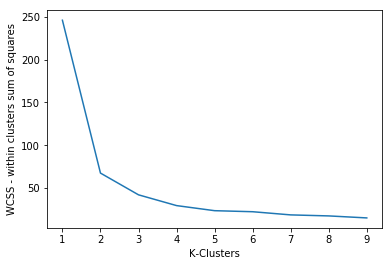

In [13]:
plt.plot(range(1,10),wcss)
plt.xlabel('K-Clusters')
plt.ylabel('WCSS - within clusters sum of squares')
plt.show()

## from the above graph,we can say the optimal K-value is 3